Priority Scheduling Algorithm (Non-Preemptive)

Priority Scheduling Algorithm (NON-PREEMPTIVE)

Process Order   Burst Time      Waiting Time    Turnaround Time
	2          1               0               	 2         
	5          5               1               	 6         
	1          10              6               	 7         
	3          2               16              	 19        
	4          1               18              	 22        
1. Process Order :P2,P5,P1,P3,P4
2. Total Completion Time :0,1,6,16,18,19
3. Waiting time :0,1,6,16,18
4. Processes with wait time:('P2', 0),('P5', 1),('P1', 6),('P3', 16),('P4', 18)
5. Average Waiting  time :8.2
6. Average turn around  time :11.2


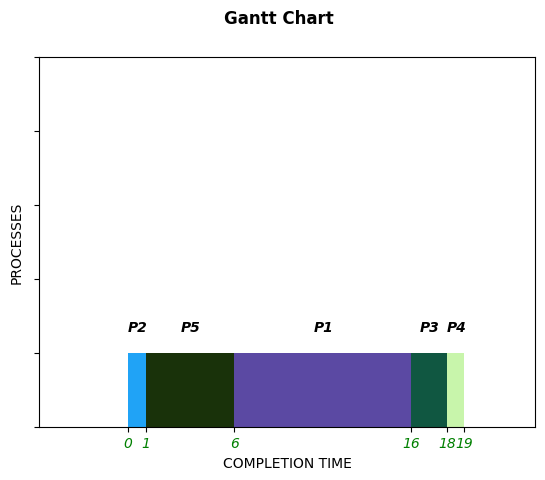

In [1]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import random
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

def drawGantt(n,processes,waitTime,turnaroundTime,processorder):
    # Declaring a figure "gnt", # Setting Y-axis limits, X-axis limits, # Setting labels for x-axis and y-axis
    totaltime = []
    fig, gnt = plt.subplots()
    ax = plt.gca()
    
    plt.ylabel("Processes")
    plt.xlabel("X Label")
    
    gnt.set_xlim(-5, waitTime[-1]+5)
    gnt.set_ylim(0, 5)
    
    gnt.set_xlabel('COMPLETION TIME')
    gnt.set_ylabel('PROCESSES')
    
    totaltime = waitTime.copy()
    totaltime.append(waitTime[-1]+processes[-1][-2])
    
    ax.axes.yaxis.set_ticklabels([])
    ax.set_xticks(totaltime)
    ax.set_xticklabels(labels = totaltime, fontstyle='italic', color='green')
    
    # Setting graph attribute
    #gnt.grid(True)
    
    no_of_colors=n
    colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])for j in range(no_of_colors)]

    # Declaring a bar in schedule
    i = 0
    while i < len(waitTime):
        ax.text((waitTime[i]+(totaltime[i+1]-waitTime[i])/2)-0.5, 1.3, processorder[i], style='italic',weight='bold')
        gnt.broken_barh([(totaltime[i], totaltime[i+1]-totaltime[i])], (0, 1), facecolors =(colors[i]))
        i += 1
        
    merge = list(zip((processorder), (waitTime)))
    
    print("1. Process Order :"+ str(",".join(str(item) for item in processorder)))
    print("2. Total Completion Time :"+ str(",".join(str(item) for item in totaltime)))
    print("3. Waiting time :"+ str(",".join(str(item) for item in waitTime)) )
    print ("4. Processes with wait time:" +  str(",".join(str(item) for item in merge)))
    print("5. Average Waiting  time :"+ str(sum(waitTime)/n))
    print("6. Average turn around  time :"+ str(sum(turnaroundTime)/n))
    
    fig.suptitle('Gantt Chart\n', fontweight ="bold")

    return(plt.savefig("prgantt.png"))

def priorityScheduling():
   # Variables
   n = 0
   processes = []
   waitTime = []
   turnaroundTime = []
   filedata = []
   processorder = []
    
   #read file line by line to get input of algorithm
   filepath = 'priority.txt'
   with open(filepath) as fp:
        line = fp.readline()
        cnt = 1
        while line:
            filedata_lines = line.strip().split(":")
            filedata.append(filedata_lines[1].split(","))
            line = fp.readline()
            cnt += 1 
        
   proc = []
   for list in filedata:
        n = len(filedata)
        proc.append([int(s) for s in list])
        processes = proc
      
   # sort processes based on priority
   for i in range(n):
       # Initially store 0
       waitTime.append(0)
       for j in range(n):
           # comparing priority
           if(processes[i][2] < processes[j][2]):
               # Swapping processes
               temp = processes[i]
               processes[i] = processes[j]
               processes[j] = temp
      
   # Iterating processes
   for i in range(1, n):
       waitTime[i] = 0
       for j in range(i):
           # Accumulating waiting time
           waitTime[i] = waitTime[i] + processes[j][1]
          
   # turnaround time
   for i in range(n):
       turnaroundTime.append(processes[i][0] + waitTime[i])

   # Process details
   print(color.BOLD + color.UNDERLINE+"Priority Scheduling Algorithm (NON-PREEMPTIVE)"+color.END)
   print(color.BOLD+"\n%-15s %-15s %-15s %-10s"%("Process Order", "Burst Time", "Waiting Time", "Turnaround Time"+color.END))
   for i in range(len(processes)):
       print("\t%-10d %-15d %-15d \t %-10d"%(processes[i][0], processes[i][1], waitTime[i], turnaroundTime[i]))
       processorder.append("P"+str(processes[i][0]))
        
   #ganttchart
   pr_gantt  = drawGantt(n,processes,waitTime,turnaroundTime,processorder)
    
# start : call priority algorithm
priorityScheduling()